In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

In [2]:
import pandas as pd
import numpy as np

# Read the CSV file and drop rows with missing values
df = pd.read_csv('C:\\Users\\Gebruiker\\Documents\\PycharmProjects\\PythonProject\\merged_features_IC50_gtpase_kras.csv')
df = df.dropna()  # or use df.dropna(inplace=True)

# Prepare X by dropping the non-feature columns
X = df.drop(columns=['Standard Value', 'ChEMBL ID', 'Smiles'])

# Clean the target values: remove '<' and '>' and convert to float
#y = df['SV'].str.lstrip('<>').astype(float)

# Create a DataFrame for y
y_df = df['Standard Value']

# Convert IC50 from nM to M and compute pIC50
y_df['pIC50'] = -np.log10(df['Standard Value'] / 1e9)

y_df.head()

y = y_df['pIC50']

In [3]:
model = RandomForestRegressor(max_depth=20, min_samples_leaf=10)
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])

scorers = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error)
}

cv = KFold(n_splits=15, shuffle=True, random_state=None)
scores_r2 = cross_val_score(pipe, X, y, cv=cv, scoring=scorers['r2'])
scores_mse = cross_val_score(pipe, X, y, cv=cv, scoring=scorers['mse'])

mean_r2 = scores_r2.mean()
mean_mse = scores_mse.mean()

print("Mean R2 Score:", mean_r2)
# print("Mean MSE Score:", mean_mse)

Mean R2 Score: 0.6626359702389096


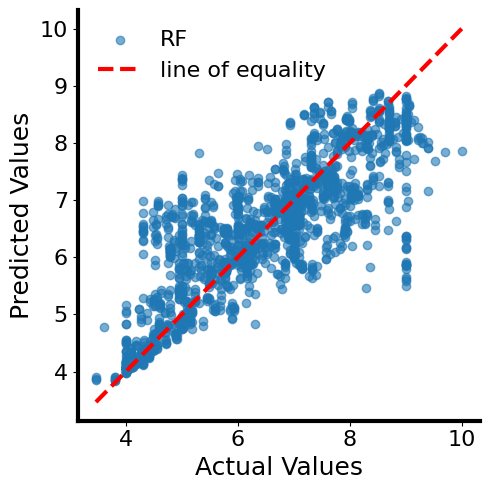

In [5]:
import matplotlib as mpl
# Set global plot parameters
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

def clean_plot(ax, legend=True):
    """Custom function to clean plots."""
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(3)    # Y-axis
    ax.spines['bottom'].set_linewidth(3)  # X-axis
    if legend:
        ax.legend(frameon=False, fontsize=16)

# Get cross-validated predictions
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(pipe, X, y, cv=cv)

# Create the plot
plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred, alpha=0.6, label='RF')
plt.plot([y.min(), y.max()],
         [y.min(), y.max()], 'r--', label='line of equality')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

clean_plot(plt.gca())
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()

# Save and show
plt.savefig('RF_GTPase_KRas_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()